In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import time
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import matplotlib.pyplot as plt

import src
from src.reload import deep_reload

In [65]:
# Loading in itineraries
deep_reload(src)

if os.path.isfile('Data/Generated_Data/itineraries.pkl'):
    
    itineraries=pkl.load(open('Data/Generated_Data/itineraries.pkl','rb'))
    
else:
    
    itineraries=src.itineraries.MakeItineraries(n_households=100000)
    
    pkl.dump(itineraries,open('Data/Generated_Data/itineraries.pkl','wb'))

In [48]:
# Calculating UF for all itineraries with daily charging and 200 km range
deep_reload(src)

veh_range=[
    150,
]

conditions=[
]

charge_events=[
]

utility_factor=src.utility_factors.UtilityFactor(
    itineraries,
    veh_range,
    conditions=conditions,
    charge_events=charge_events,
    disp=True)

print(utility_factor)

 Progress [------------------->] (65938/65938) 100%, 7372.54 it/s, 8.94 seconds elapsed, -0.00 seconds remaining         

[0.62899997]


In [49]:
# Calculating UF for urban BEV itineraries with work charging and 200 km range
deep_reload(src)

veh_range=[
    150,
]

conditions=[
    ['URBRUR','==',1],
    ['HFUEL','==',3],
]

charge_events=[
    3,
]

utility_factor=src.utility_factors.UtilityFactor(
    itineraries,
    veh_range,
    conditions=conditions,
    charge_events=charge_events,
    disp=True)

print(utility_factor)

 Progress [------------------->] (241/241) 100%, 8977.49 it/s, 0.03 seconds elapsed, -0.00 seconds remaining         

[0.97281671]


In [51]:
# Calculating UF for all itineraries with daily charging and 0 - 500 km range
deep_reload(src)

veh_range=np.linspace(0,500,20)

conditions=[
]

charge_events=[
]

utility_factor=src.utility_factors.UtilityFactor(
    itineraries,
    veh_range,
    conditions=conditions,
    charge_events=charge_events,
    disp=True)

print(utility_factor)

 Progress [------------------->] (65938/65938) 100%, 14553.30 it/s, 4.53 seconds elapsed, -0.00 seconds remaining         

[-3.93010906e-06  2.10871917e-01  3.61309207e-01  4.67055460e-01
  5.42305436e-01  5.97931426e-01  6.40691176e-01  6.74686002e-01
  7.02446652e-01  7.25722047e-01  7.45412658e-01  7.62320938e-01
  7.77171829e-01  7.89984966e-01  8.01219127e-01  8.11399896e-01
  8.20583451e-01  8.29124290e-01  8.37147535e-01  8.44718953e-01]


In [69]:
# Producing data for comparison figure
deep_reload(src)

veh_range=np.linspace(0,500,100)

vehicle_types=[['FUELTYPE','==',1],['HFUEL','==',4],['HFUEL','==',2],['HFUEL','==',3]]
charge_events=[[],[1,2],[3],list(range(19))+[97]]
max_itineraries=10000

utility_factor_cases=[]

for idx_v in range(len(vehicle_types)):
    for idx_c in range(len(charge_events)):
        print(idx_v,idx_c,end='\r')
        
        uf=utility_factor=src.utility_factors.UtilityFactor(
            itineraries,
            veh_range,
            conditions=[vehicle_types[idx_v]],
            charge_events=[charge_events[idx_c]],
            max_itineraries=max_itineraries,
            disp=False)
        
        utility_factor_cases.append(uf)

utility_factor_cases=np.array(utility_factor_cases)

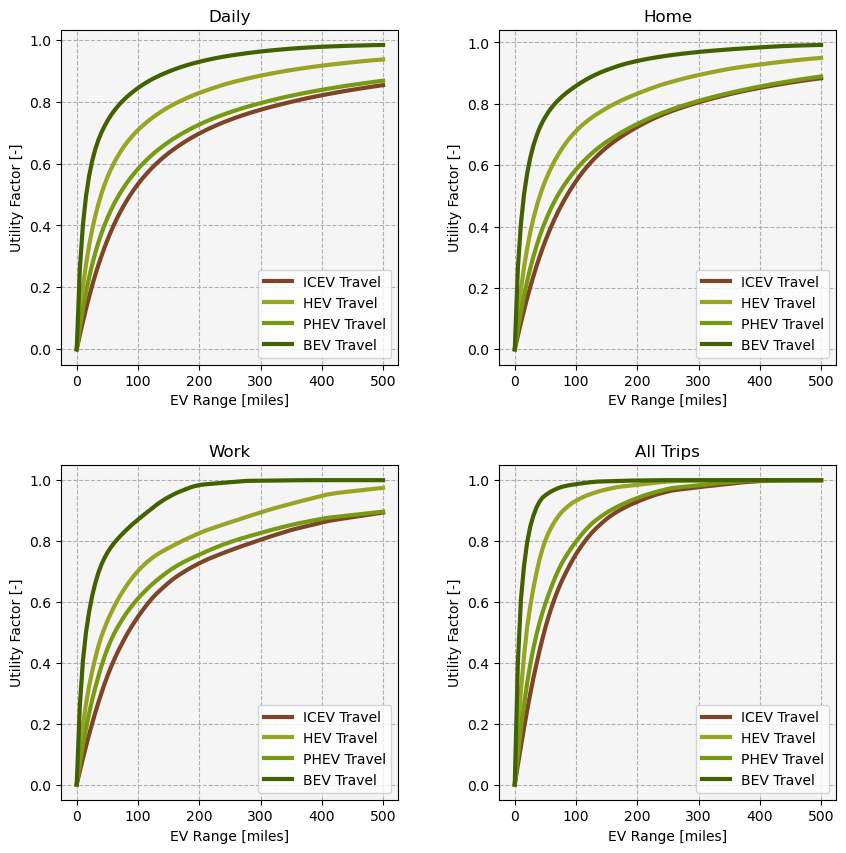

In [73]:
deep_reload(src)

fig,ax=plt.subplots(2,2,figsize=(10,10),gridspec_kw={'hspace':.3,'wspace':.3})

color_scheme=src.figures.colors['forest']

labels=['ICEV Travel','HEV Travel','PHEV Travel','BEV Travel']

y=utility_factor_cases[:4]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[0,0],
                       line_kwargs={'lw':3},
                       axes_kwargs={'facecolor':'whitesmoke',
                                    'title':'Daily',
                                    'xlabel':'EV Range [miles]',
                                    'ylabel':'Utility Factor [-]'
                                    })

y=utility_factor_cases[4:8]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[0,1],
                       line_kwargs={'lw':3},
                       axes_kwargs={'facecolor':'whitesmoke',
                                    'title':'Home',
                                    'xlabel':'EV Range [miles]',
                                    'ylabel':'Utility Factor [-]'
                                   })

y=utility_factor_cases[8:12]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[1,0],
                       line_kwargs={'lw':3},
                       axes_kwargs={'facecolor':'whitesmoke',
                                    'title':'Work',
                                    'xlabel':'EV Range [miles]',
                                    'ylabel':'Utility Factor [-]'
                                   })

y=utility_factor_cases[12:16]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[1,1],
                       line_kwargs={'lw':3},
                       axes_kwargs={'facecolor':'whitesmoke',
                                    'title':'All Trips',
                                    'xlabel':'EV Range [miles]',
                                    'ylabel':'Utility Factor [-]'
                                   })

# fig.savefig('Document/figs/UF_Charging_Powertrains.png',bbox_inches='tight',dpi=300)